MAE: 0.41931967055845276
MSE: 0.30075217460472864
RMSE: 0.548408765980932
R2 Score: 0.6992478253952713
MAPE:  4.979165516689162
InSample_accuracy
---------------------------
OutSample_accuracy
MAE: 0.4183971192553884
MSE: 0.29994445027859223
RMSE: 0.5476718454317259
R2 Score: 0.7000555497214078
MAPE:  1.799642979488017
InSample_accuracy
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


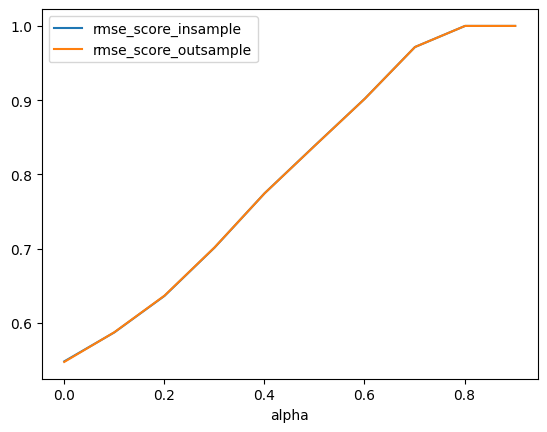

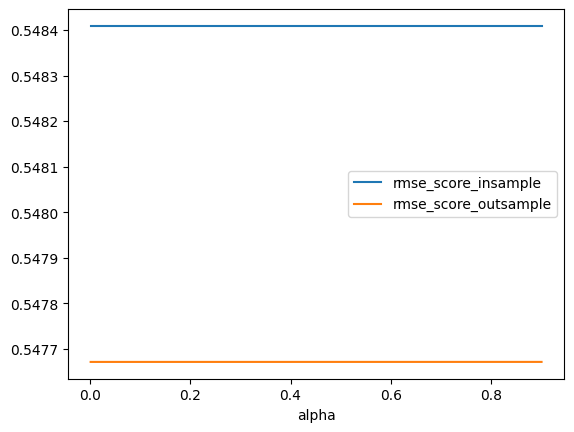

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import ensemble
from sklearn.linear_model import Lasso,Ridge#load train data
filename = "encoded_data_03_12.csv"
df_data = pd.read_csv(f"../DataSets/EncodedData/{filename}", sep=",", encoding="UTF-8")
df_data.head()#to know each and every column execute the following

X = df_data.drop(columns=['log_market_value_base10'])
y = df_data['log_market_value_base10']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.25,random_state=120)
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)#Linear Regression
lm = LinearRegression()
lm.fit(x_train,y_train)#predictions on train data
x_pred = lm.predict(x_train)
x_pred = x_pred.reshape(-1,1)#Prediction of test data
y_pred = lm.predict(x_test)
y_pred= y_pred.reshape(-1,1)
def scores_(y,x):
    print('MAE:', metrics.mean_absolute_error(y, x))
    print('MSE:', metrics.mean_squared_error(y, x))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y, x)))
    print('R2 Score:' ,metrics.r2_score(y,x))
    print("MAPE: ", metrics.mean_absolute_percentage_error(y, x))
    print('InSample_accuracy')
scores_(y_train, x_pred)
print('---------------------------')
print('OutSample_accuracy')
scores_(y_test,y_pred)
def regularization_model(model,alpha_range):
 rmse_score_insample=[]
 rmse_score_outsample=[]
 r2_score_insample=[]
 r2_score_outsample=[]
 for i in alpha_range:
    regularization = model(alpha=i)
    regularization.fit(x_train,y_train)
    y_pred_train = regularization.predict(x_train)
    y_pred_train = y_pred_train.reshape(-1,1)
    y_pred_test=regularization.predict(x_test)
    y_pred_test = y_pred_test.reshape(-1,1)
    rmse_score_insample.append(np.sqrt(metrics.mean_squared_error(y_train,y_pred_train )))
    rmse_score_outsample.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    r2_score_insample.append(metrics.r2_score(y_train, y_pred_train))
    r2_score_outsample.append(metrics.r2_score(y_test, y_pred_test))
 df=pd.DataFrame()
 df["alpha"]=alpha_range
 df["rmse_score_insample"] = rmse_score_insample
 df["rmse_score_outsample"]= rmse_score_outsample 
 df["r2_score_insample"] = r2_score_insample
 df["r2_score_outsample"] = r2_score_outsample
 return df.plot(x = "alpha", y = ["rmse_score_insample","rmse_score_outsample"])
alpha_range_lasso = np.arange(0.001,1,0.1)
print(regularization_model(Lasso,alpha_range_lasso))
alpha_range_ridge = np.arange(0.001,1,0.1)
print(regularization_model(Ridge,alpha_range_lasso))

In [8]:
X.head()

,height_in_cm,year,goals_for,goals_against,goals,assists,red_cards,yellow_cards,minutes_played,age_at_evaluation,country_of_citizenship_encoded,sub_position_encoded,club_id_encoded,domestic_competition_id_encoded
0,184.0,2012.75,31.0,14.0,11.0,1.0,0.0,6.0,1483.0,35,6.445992,6.241155,6.659857,6.525779
1,184.0,2013.25,24.0,15.0,5.0,2.0,0.0,2.0,1102.0,35,6.445992,6.241155,6.659857,6.525779
2,184.0,2013.75,14.0,21.0,4.0,2.0,0.0,1.0,950.0,36,6.445992,6.241155,6.659857,6.525779
3,184.0,2014.25,24.0,22.0,4.0,3.0,0.0,1.0,1270.0,36,6.445992,6.241155,6.659857,6.525779
4,184.0,2014.75,31.0,18.0,4.0,3.0,0.0,2.0,496.0,37,6.445992,6.241155,6.659857,6.525779


In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.linear_model import Lasso#load train data
filename = "encoded_data_03_12.csv"
df_data = pd.read_csv(f"../DataSets/EncodedData/{filename}", sep=",", encoding="UTF-8")
df_data.head()#to know each and every column execute the following

X = df_data.drop(columns=['log_market_value_base10'])
y = df_data['log_market_value_base10']

In [12]:
feature_names = [col for col in X.columns]
feature_names

['height_in_cm',
 'year',
 'goals_for',
 'goals_against',
 'goals',
 'assists',
 'red_cards',
 'yellow_cards',
 'minutes_played',
 'age_at_evaluation',
 'country_of_citizenship_encoded',
 'sub_position_encoded',
 'club_id_encoded',
 'domestic_competition_id_encoded']

Ignored features: ['height_in_cm', 'assists', 'red_cards', 'yellow_cards', 'country_of_citizenship_encoded', 'sub_position_encoded', 'domestic_competition_id_encoded']
Kept features: ['year', 'goals_for', 'goals_against', 'goals', 'minutes_played', 'age_at_evaluation', 'club_id_encoded']


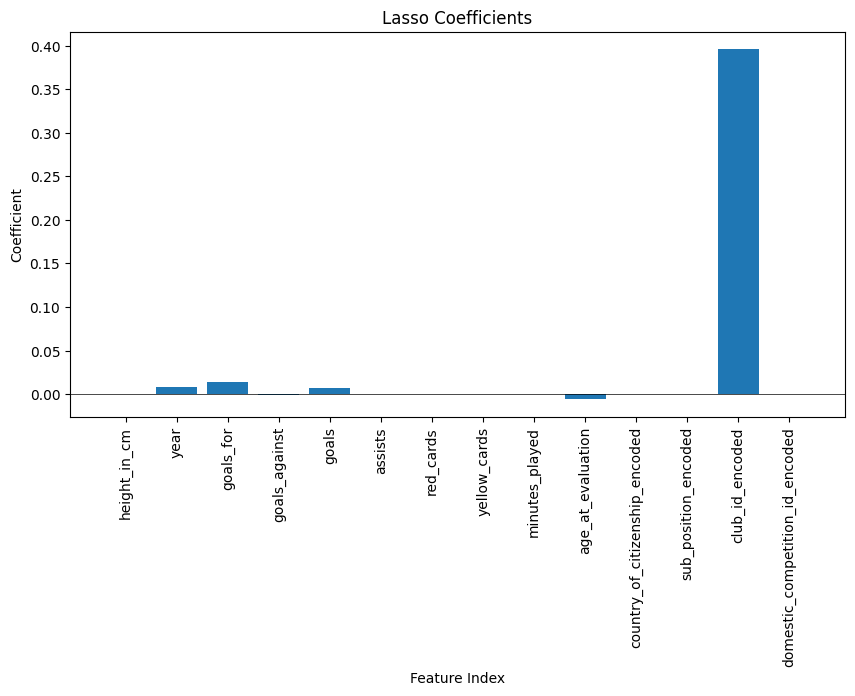

In [17]:

# Convert feature matrix X to a pandas DataFrame and name the columns

X_df = pd.DataFrame(X, columns=feature_names)

# Create and fit Lasso Regression model
alpha = 0.1  # regularization strength
lasso = Lasso(alpha=alpha)
lasso.fit(X, y)

# Get coefficients and identify which ones are ignored (zero)
coef = lasso.coef_
ignored_features_idx = np.where(coef == 0)[0]
kept_features_idx = np.where(coef != 0)[0]

# Get names of kept and ignored features
ignored_features = X_df.columns[ignored_features_idx]
kept_features = X_df.columns[kept_features_idx]

print("Ignored features:", ignored_features.tolist())
print("Kept features:", kept_features.tolist())

# Plot which features are ignored
plt.figure(figsize=(10, 5))
plt.bar(range(len(coef)), coef)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient')
plt.title('Lasso Coefficients')
plt.xticks(range(len(coef)), feature_names, rotation=90)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()
